# **<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> PROJET MACHINE LEARNING II : BANK CHURN SCORING ,ANALYSE EXPLORATOIRE</span> </center>**


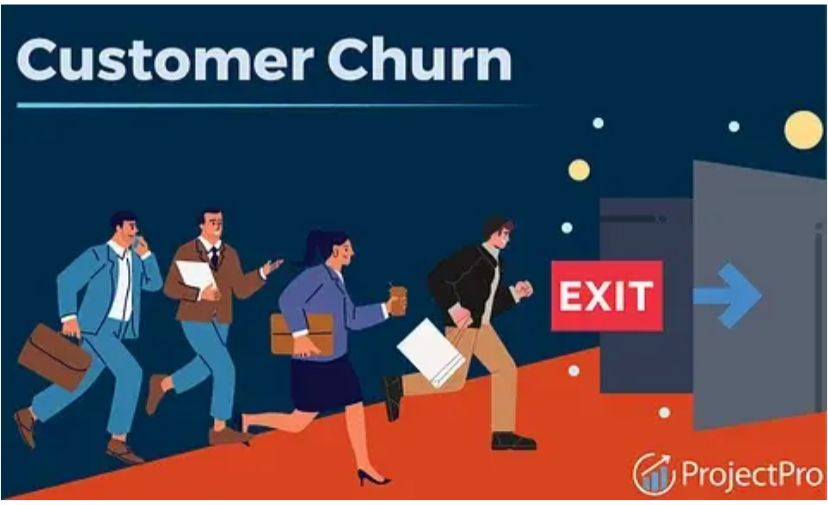

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; "> 1. Importation des librairies et chargement des données</h1>
</div>

<small style="font-family:Comic Sans MS; color:black; font-weight: bold; font-size: 35px">  </small>
<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; "> 1.1 Importation de librairies:</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import gaussian_kde
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


<small style="font-family:Comic Sans MS; color:black; font-weight: bold; font-size: 35px">  </small>
<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; "> 1.2 Importation de la base:</h1>
</div>

In [2]:
# Chargement des données
data = pd.read_csv("train.csv")

# Affichage des 5 premières lignes
data.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
# --- Suppression de la colonne 'id' dans la base
data = data.drop(['id'], axis=1)
data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; "> 2. Analyse des données exploratoires</h1>
</div>

<small style="font-family:Comic Sans MS; color:black; font-weight: bold; font-size: 35px">  </small>
<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; "> 2.1 Recherche de doublons:</h1>
</div>

In [5]:
# --- Recherche de doublons
print(f"Nombre de doublons :{data.duplicated().sum()}")

Nombre de doublons :0


Pas de doublons

<small style="font-family:Comic Sans MS; color:black; font-weight: bold; font-size: 35px">  </small>
<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; "> 2.2 Recherche de valeurs manquante :</h1>
</div>

In [7]:
# --- Calcul du pourcentage de valeurs manquantes pour chaque colonne de la base
missing_pourcentage = data.isnull().sum() / len(data) * 100

# --- Affichage du pourcentage de valeurs manquantes pour chaque colonne
missing_pourcentage

,0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0
HasCrCard,0.0


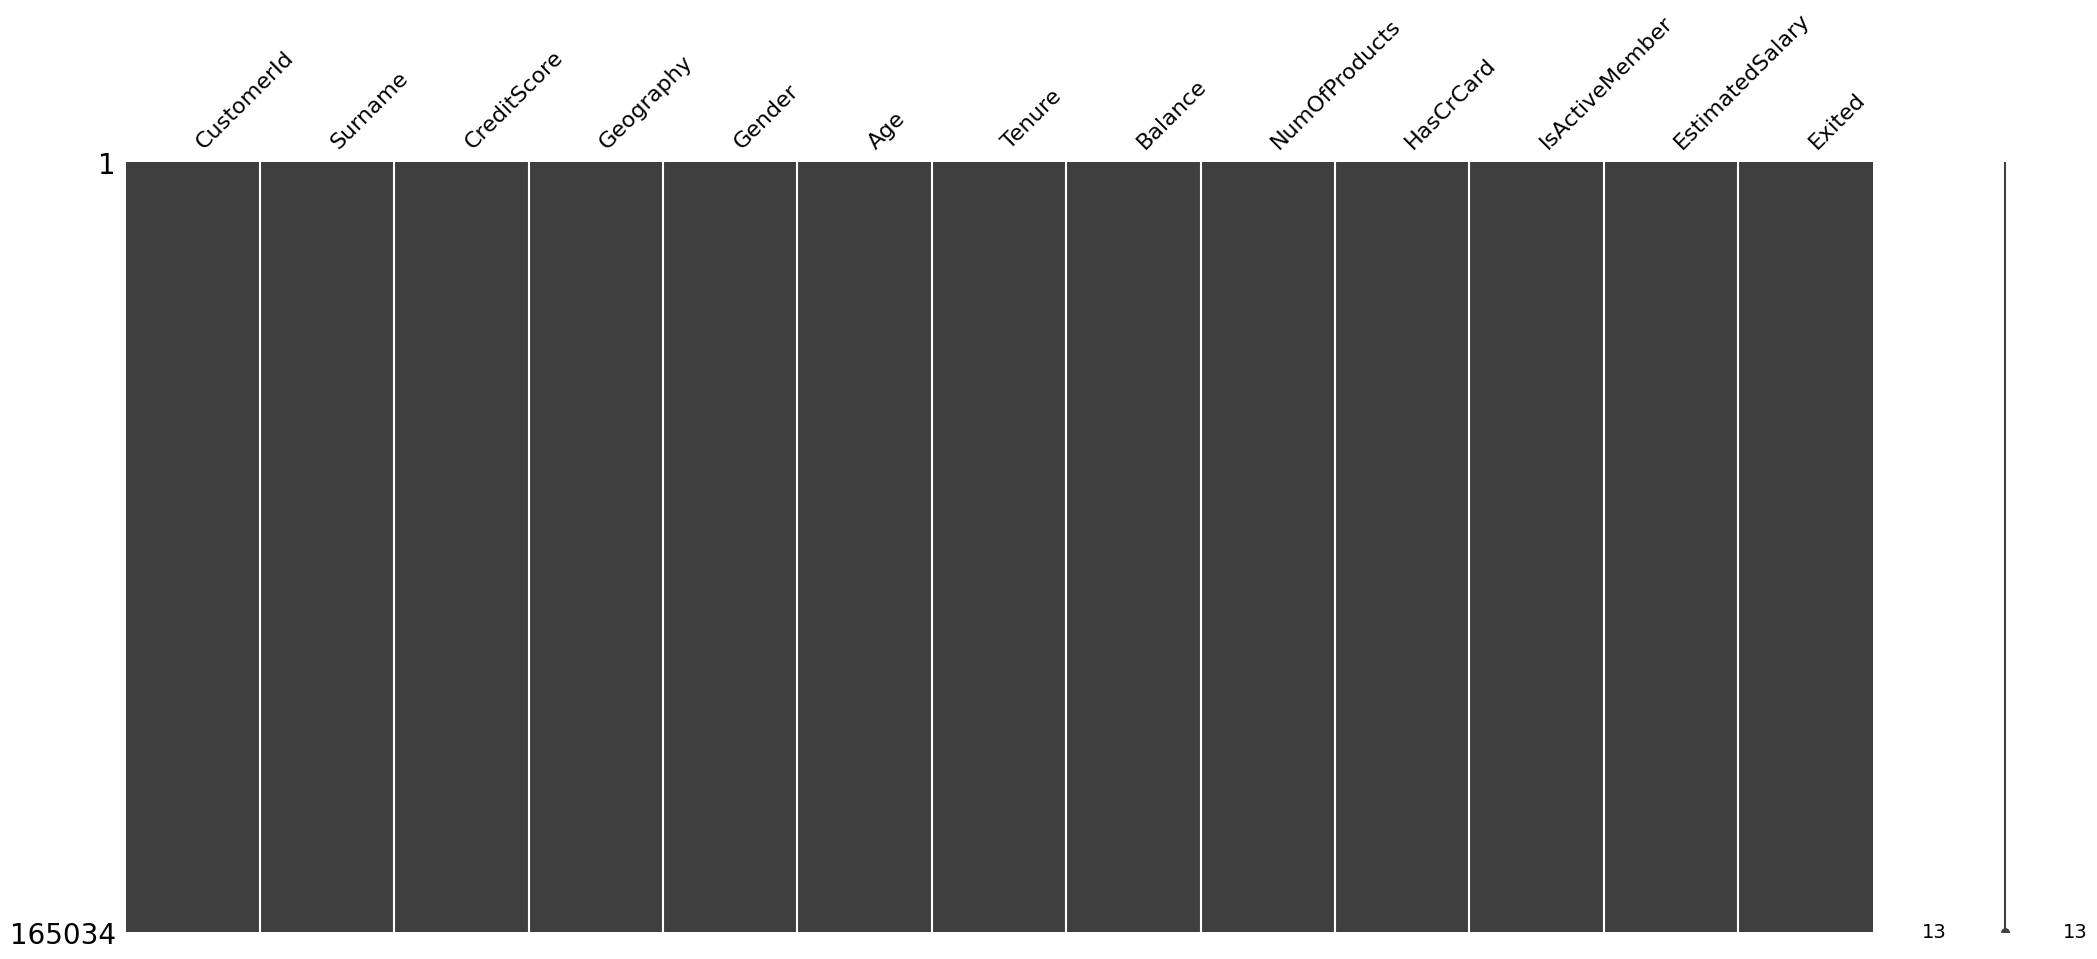

In [8]:
# --- Qffichade les valeur manquante
msno.matrix(data);

Les données ne presentent pas de valeurs manquante

In [ ]:
# --- Résumé de la statistique des données
data.describe().style.format(precision=2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.00,9998.00,9998.00,9998.00,9998.00,9998.00,9998.00,9998.00,9998.00,9998.00,9998.00
mean,5003.50,15690938.31,650.53,38.92,5.01,76481.49,1.53,0.71,0.51,100099.79,0.20
std,2886.32,71923.99,96.63,10.49,2.89,62393.19,0.58,0.46,0.50,57510.94,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2504.25,15628537.00,584.00,32.00,3.00,0.00,1.00,0.00,0.00,50983.75,0.00
50%,5003.50,15690732.00,652.00,37.00,5.00,97173.29,1.00,1.00,1.00,100218.21,0.00
75%,7502.75,15753225.50,718.00,44.00,7.00,127641.42,2.00,1.00,1.00,149395.88,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; "> 3. Visualisation des donnees exploratoire</h1>
</div>

3.1 Distribution de la variable cible

In [9]:
from plotly.subplots import make_subplots

In [10]:
# --- Données
categories = ["Not-Churn Customer", "Churn Customer"]
effectifs = [5163, 1869]
colors = ['#228B22', '#F4B460']

# --- Création du subplot avec 1 ligne, 2 colonnes
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'xy'}]],
                    subplot_titles=("Churn - Not-Churn %", "Number of Churn - Not-Churn Customers"))

# --- Graphique en camembert
fig.add_trace(
    go.Pie(
        labels=categories,
        values=effectifs,
        hole=0.4,
        textinfo='label+percent',
        hoverinfo='label+percent',
        pull=[0.1, 0],
        marker=dict(colors=colors, line=dict(color='black', width=2))
    ),
    row=1, col=1
)

# --- Graphique à barres
fig.add_trace(
    go.Bar(
        x=categories,
        y=effectifs,
        marker_color=colors,
        text=effectifs,
        textposition='outside',
        marker_line_color='black',
        marker_line_width=1.5
    ),
    row=1, col=2
)

# --- Mise en page
fig.update_layout(
    title_text='Visualisation du Churn',
    width=1000,
    height=500,
    showlegend=False
)

fig.show()


3.2 Utilisation de carte par pays

Geography
France     71591.0
Germany    25947.0
Spain      26890.0
Name: HasCrCard, dtype: float64


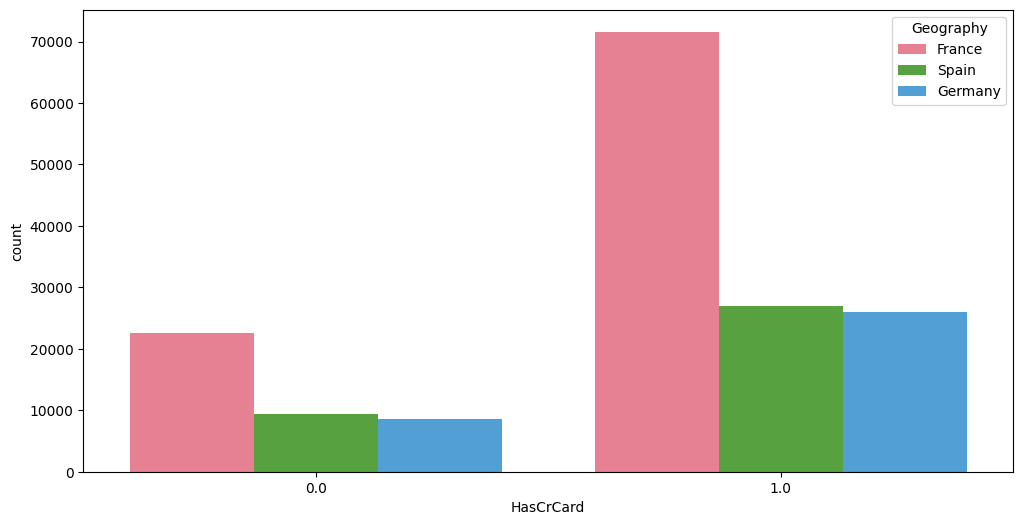

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(x="HasCrCard",hue = "Geography", data=data, palette="husl");
print(data.groupby('Geography')["HasCrCard"].sum())

3.3 Répartition par genre des désabonnement

In [12]:
# --- Filtrer les clients qui se sont désabonnés
churned_df = data[data['Exited'] == 1]

# --- Libellés
g_labels = ['Male', 'Female']

# --- Création du graphique en anneau
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'domain'}]])
fig.add_trace(go.Pie(labels=g_labels,
                     values=churned_df['Gender'].value_counts().reindex(g_labels),
                     name="Churned by Gender"),
              1, 1)

# --- Style en donut
fig.update_traces(hole=0.4, hoverinfo="label+percent+name", textfont_size=16)

# --- Mise en page
fig.update_layout(
    title_text="Répartition par genre des clients désabonnés",
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

Les clients désabonnés sont composés à 55,9 % de femmes et à 44,1 % d’hommes.

3.4  Distribution of Balance by churn

<ipython-input-13-3698442231>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-13-3698442231>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




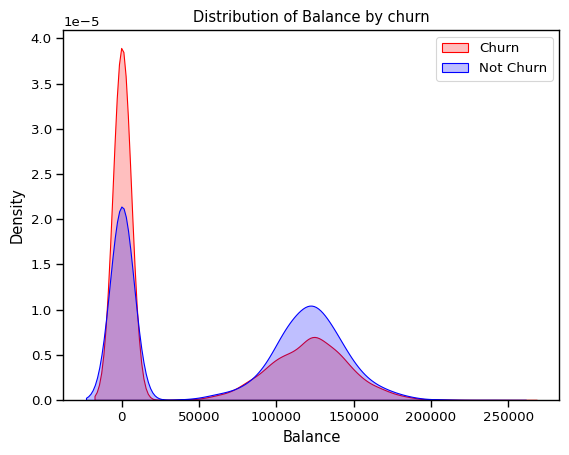

In [13]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.Balance[(data["Exited"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(data.Balance[(data["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Churn","Not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Balance');
ax.set_title('Distribution of Balance by churn');

3.5  Distribution of CreditScore by churn

<ipython-input-14-2986429248>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-14-2986429248>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




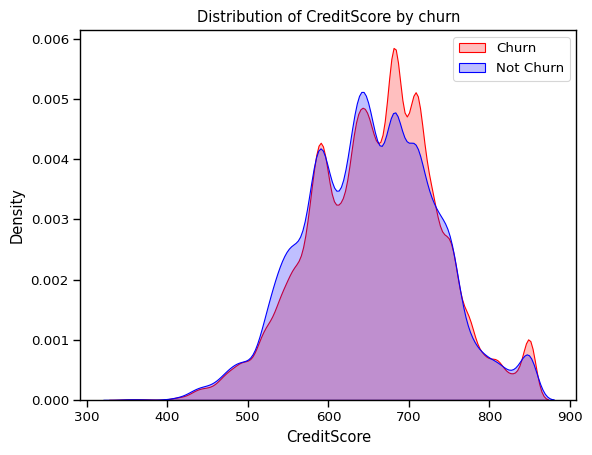

In [14]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.CreditScore[(data["Exited"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(data.CreditScore[(data["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Churn","Not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CreditScore');
ax.set_title('Distribution of CreditScore by churn');

3.6 Distribution of Age by churn

<ipython-input-15-1041219171>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-1041219171>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




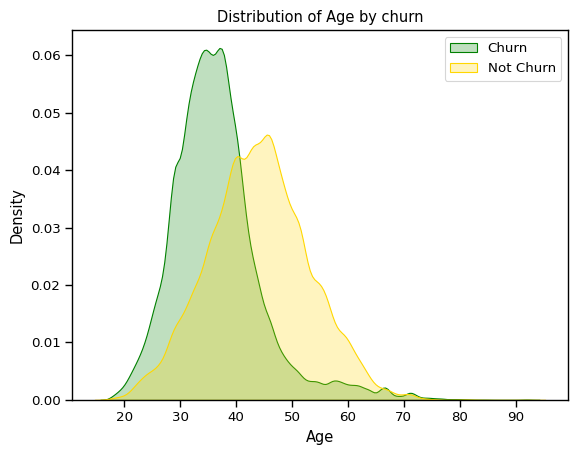

In [15]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.Age[(data["Exited"] == 0) ],
                color="Green", shade = True);
ax = sns.kdeplot(data.Age[(data["Exited"] == 1) ],
                ax =ax, color="Gold", shade= True);
ax.legend(["Churn","Not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Distribution of Age by churn');

3.6 Distribution of EstimatedSalary by churn

<ipython-input-16-1496335964>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-16-1496335964>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




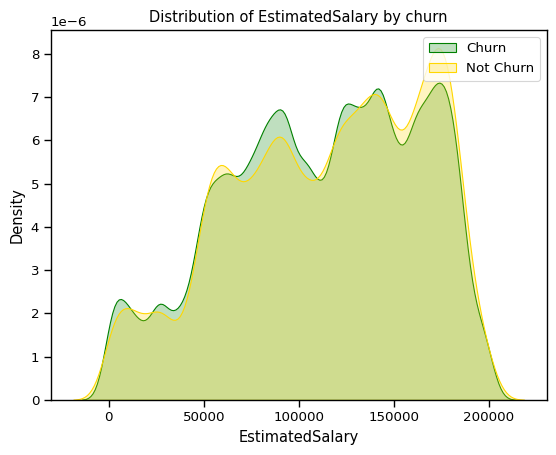

In [16]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 0) ],
                color="Green", shade = True);
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 1) ],
                ax =ax, color="Gold", shade= True);
ax.legend(["Churn","Not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('EstimatedSalary');
ax.set_title('Distribution of EstimatedSalary by churn');

3.7 Distribution of EstimatedSalary by churn

<ipython-input-17-1056127193>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-17-1056127193>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




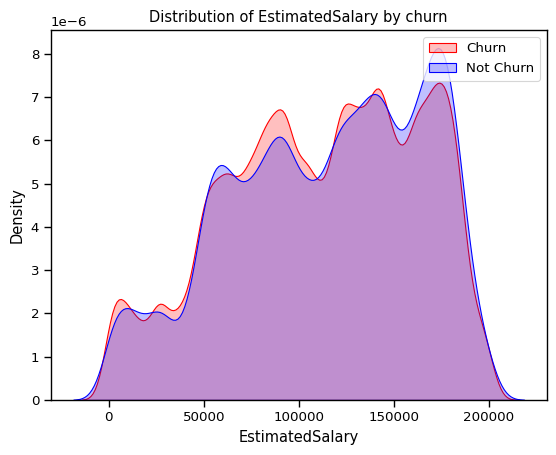

In [17]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(data.EstimatedSalary[(data["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Churn","Not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('EstimatedSalary');
ax.set_title('Distribution of EstimatedSalary by churn');

3.8 Tenure vs Churn

In [18]:

fig = px.box(data, x='Exited', y = 'Tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Years)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()